# Import Library

In [1]:
import numpy as np
import tensorflow as tf
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, BatchNormalization, GlobalAveragePooling2D, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Dataset

- Load Data


In [2]:
dataset_path = '../dataset/img'
train_path = '../dataset/train_alphabet'
test_path = '../dataset/test_alphabet'

- Augmentasi Data & Splitting Data Menjadi train, validation dan test

In [3]:
datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    brightness_range=[0.7,1.3],
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.1,
    horizontal_flip=False,
    )
val_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
)
train_gen = datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical',
    # subset = 'training',
    shuffle=True
)
val_gen = val_datagen.flow_from_directory(
    test_path,
    target_size = (224,224),
    batch_size = 64,
    class_mode ='categorical',
    # subset = 'validation',
    shuffle=False
)
print(train_gen.class_indices)
print(val_gen.class_indices)

Found 24300 images belonging to 27 classes.
Found 2700 images belonging to 27 classes.
{'A': 0, 'B': 1, 'Blank': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}
{'A': 0, 'B': 1, 'Blank': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12, 'M': 13, 'N': 14, 'O': 15, 'P': 16, 'Q': 17, 'R': 18, 'S': 19, 'T': 20, 'U': 21, 'V': 22, 'W': 23, 'X': 24, 'Y': 25, 'Z': 26}


- Layer Convolutional Neural Network Scratch From Zero

In [ ]:
model = Sequential([
    tf.keras.Input(shape=(224, 224, 3)),
    
    Conv2D(32, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(29, activation='softmax') 
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 109, 109, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 52, 52, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 24, 24, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         7,453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 463,581 (1.77 MB)

 Trainable params: 462,621 (1.76 MB)

 Non-trainable params: 960 (3.75 KB)

In [4]:
callbacks_model = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True,verbose=1),
    ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1),
    ModelCheckpoint('../best_model/model.h5', monitor='val_loss', save_best_only=True,verbose=1),
    ]

In [ ]:
history = model.fit(train_gen,validation_data=val_gen,epochs=50, callbacks=callbacks_model)

d:\Capstone\Capstone Model\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2963 - loss: 2.3705

d:\Capstone\Capstone Model\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2175/2175 ━━━━━━━━━━━━━━━━━━━━ 3944s 2s/step - accuracy: 0.2964 - loss: 2.3702 - val_accuracy: 0.5819 - val_loss: 1.5274 - learning_rate: 0.0010
Epoch 2/50
2175/2175 ━━━━━━━━━━━━━━━━━━━━ 3308s 2s/step - accuracy: 0.8427 - loss: 0.4780 - val_accuracy: 0.5915 - val_loss: 1.6475 - learning_rate: 0.0010
Epoch 3/50
1890/2175 ━━━━━━━━━━━━━━━━━━━━ 6:20 1s/step - accuracy: 0.9173 - loss: 0.2539

KeyboardInterrupt: 

- Layer Convolutional Neural Network Transfer Learning MobileNetV2

In [5]:
base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False  # Freeze layer dulu
model_mobile = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(27, activation='softmax')
])
model_mobile.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
model_mobile.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 1280)           │         5,120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 27)             │         6,939 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,597,979 (9.91 MB)

 Trainable params: 337,435 (1.29 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

In [ ]:
history_mobile = model_mobile.fit(train_gen,validation_data=val_gen,epochs=50, callbacks=callbacks_model)

d:\Capstone\Capstone Model\.venv\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.1291 - loss: 3.5690
Epoch 1: val_loss improved from inf to 1.53195, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 1069s 3s/step - accuracy: 0.1294 - loss: 3.5674 - val_accuracy: 0.5893 - val_loss: 1.5319 - learning_rate: 1.0000e-04
Epoch 2/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.4347 - loss: 1.9218
Epoch 2: val_loss improved from 1.53195 to 0.97807, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 687s 2s/step - accuracy: 0.4348 - loss: 1.9214 - val_accuracy: 0.7367 - val_loss: 0.9781 - learning_rate: 1.0000e-04
Epoch 3/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.5668 - loss: 1.4395
Epoch 3: val_loss improved from 0.97807 to 0.75974, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.5668 - loss: 1.4394 - val_accuracy: 0.7900 - val_loss: 0.7597 - learning_rate: 1.0000e-04
Epoch 4/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6265 - loss: 1.1994
Epoch 4: val_loss improved from 0.75974 to 0.63136, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 684s 2s/step - accuracy: 0.6265 - loss: 1.1994 - val_accuracy: 0.8215 - val_loss: 0.6314 - learning_rate: 1.0000e-04
Epoch 5/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6714 - loss: 1.0592
Epoch 5: val_loss improved from 0.63136 to 0.55666, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.6714 - loss: 1.0592 - val_accuracy: 0.8374 - val_loss: 0.5567 - learning_rate: 1.0000e-04
Epoch 6/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7023 - loss: 0.9458
Epoch 6: val_loss improved from 0.55666 to 0.50104, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.7023 - loss: 0.9458 - val_accuracy: 0.8515 - val_loss: 0.5010 - learning_rate: 1.0000e-04
Epoch 7/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7261 - loss: 0.8625
Epoch 7: val_loss improved from 0.50104 to 0.46145, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.7261 - loss: 0.8625 - val_accuracy: 0.8607 - val_loss: 0.4615 - learning_rate: 1.0000e-04
Epoch 8/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7437 - loss: 0.8027
Epoch 8: val_loss improved from 0.46145 to 0.42935, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 683s 2s/step - accuracy: 0.7437 - loss: 0.8027 - val_accuracy: 0.8674 - val_loss: 0.4294 - learning_rate: 1.0000e-04
Epoch 9/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7579 - loss: 0.7587
Epoch 9: val_loss improved from 0.42935 to 0.40463, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 687s 2s/step - accuracy: 0.7579 - loss: 0.7587 - val_accuracy: 0.8781 - val_loss: 0.4046 - learning_rate: 1.0000e-04
Epoch 10/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7741 - loss: 0.6962
Epoch 10: val_loss improved from 0.40463 to 0.38686, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 786s 2s/step - accuracy: 0.7741 - loss: 0.6962 - val_accuracy: 0.8841 - val_loss: 0.3869 - learning_rate: 1.0000e-04
Epoch 11/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7828 - loss: 0.6824
Epoch 11: val_loss improved from 0.38686 to 0.36822, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 930s 2s/step - accuracy: 0.7828 - loss: 0.6824 - val_accuracy: 0.8911 - val_loss: 0.3682 - learning_rate: 1.0000e-04
Epoch 12/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7874 - loss: 0.6586
Epoch 12: val_loss improved from 0.36822 to 0.35375, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.7874 - loss: 0.6585 - val_accuracy: 0.8911 - val_loss: 0.3537 - learning_rate: 1.0000e-04
Epoch 13/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8037 - loss: 0.6234
Epoch 13: val_loss improved from 0.35375 to 0.33960, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 686s 2s/step - accuracy: 0.8037 - loss: 0.6234 - val_accuracy: 0.8956 - val_loss: 0.3396 - learning_rate: 1.0000e-04
Epoch 14/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8051 - loss: 0.5942
Epoch 14: val_loss improved from 0.33960 to 0.32644, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.8051 - loss: 0.5942 - val_accuracy: 0.9007 - val_loss: 0.3264 - learning_rate: 1.0000e-04
Epoch 15/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8106 - loss: 0.5897
Epoch 15: val_loss improved from 0.32644 to 0.31856, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 685s 2s/step - accuracy: 0.8106 - loss: 0.5896 - val_accuracy: 0.8978 - val_loss: 0.3186 - learning_rate: 1.0000e-04
Epoch 16/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8151 - loss: 0.5751
Epoch 16: val_loss improved from 0.31856 to 0.31230, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 740s 2s/step - accuracy: 0.8151 - loss: 0.5750 - val_accuracy: 0.9019 - val_loss: 0.3123 - learning_rate: 1.0000e-04
Epoch 17/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8272 - loss: 0.5321
Epoch 17: val_loss improved from 0.31230 to 0.30315, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 777s 2s/step - accuracy: 0.8272 - loss: 0.5321 - val_accuracy: 0.9041 - val_loss: 0.3032 - learning_rate: 1.0000e-04
Epoch 18/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8327 - loss: 0.5316
Epoch 18: val_loss improved from 0.30315 to 0.29757, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 695s 2s/step - accuracy: 0.8327 - loss: 0.5316 - val_accuracy: 0.9033 - val_loss: 0.2976 - learning_rate: 1.0000e-04
Epoch 19/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8364 - loss: 0.5057
Epoch 19: val_loss improved from 0.29757 to 0.28936, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 690s 2s/step - accuracy: 0.8364 - loss: 0.5057 - val_accuracy: 0.9063 - val_loss: 0.2894 - learning_rate: 1.0000e-04
Epoch 20/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8332 - loss: 0.5130
Epoch 20: val_loss improved from 0.28936 to 0.28608, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 692s 2s/step - accuracy: 0.8332 - loss: 0.5130 - val_accuracy: 0.9089 - val_loss: 0.2861 - learning_rate: 1.0000e-04
Epoch 21/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8349 - loss: 0.4988
Epoch 21: val_loss improved from 0.28608 to 0.28086, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 695s 2s/step - accuracy: 0.8349 - loss: 0.4988 - val_accuracy: 0.9137 - val_loss: 0.2809 - learning_rate: 1.0000e-04
Epoch 22/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.8422 - loss: 0.4783
Epoch 22: val_loss improved from 0.28086 to 0.27620, saving model to ../best_model/model.h5


380/380 ━━━━━━━━━━━━━━━━━━━━ 691s 2s/step - accuracy: 0.8421 - loss: 0.4783 - val_accuracy: 0.9111 - val_loss: 0.2762 - learning_rate: 1.0000e-04
Epoch 23/50
380/380 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8436 - loss: 0.4809
Epoch 23: val_loss did not improve from 0.27620
380/380 ━━━━━━━━━━━━━━━━━━━━ 1100s 3s/step - accuracy: 0.8436 - loss: 0.4809 - val_accuracy: 0.9119 - val_loss: 0.2763 - learning_rate: 1.0000e-04
Epoch 24/50
205/380 ━━━━━━━━━━━━━━━━━━━━ 8:49 3s/step - accuracy: 0.8535 - loss: 0.4420

In [ ]:
base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False                                                                                                                                                                                                                                                                   

model_mobile.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history_mobile_finetuned = model_mobile.fit(train_gen, validation_data=val_gen, epochs=50, callbacks=callbacks_model)

Epoch 1/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8247 - loss: 0.5799
Epoch 1: val_loss did not improve from 0.56957
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1822s 2s/step - accuracy: 0.8248 - loss: 0.5797 - val_accuracy: 0.8318 - val_loss: 0.6114 - learning_rate: 1.0000e-05
Epoch 2/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9286 - loss: 0.2227
Epoch 2: val_loss improved from 0.56957 to 0.46921, saving model to ../best_model/model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1804s 2s/step - accuracy: 0.9286 - loss: 0.2227 - val_accuracy: 0.8601 - val_loss: 0.4692 - learning_rate: 1.0000e-05
Epoch 3/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9525 - loss: 0.1489
Epoch 3: val_loss improved from 0.46921 to 0.40730, saving model to ../best_model/model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1805s 2s/step - accuracy: 0.9525 - loss: 0.1489 - val_accuracy: 0.8754 - val_loss: 0.4073 - learning_rate: 1.0000e-05
Epoch 4/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9598 - loss: 0.1225
Epoch 4: val_loss improved from 0.40730 to 0.39138, saving model to ../best_model/model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1967s 2s/step - accuracy: 0.9598 - loss: 0.1225 - val_accuracy: 0.8833 - val_loss: 0.3914 - learning_rate: 1.0000e-05
Epoch 5/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9676 - loss: 0.1015
Epoch 5: val_loss did not improve from 0.39138
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1952s 2s/step - accuracy: 0.9676 - loss: 0.1015 - val_accuracy: 0.8887 - val_loss: 0.3923 - learning_rate: 1.0000e-05
Epoch 6/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9726 - loss: 0.0849
Epoch 6: val_loss improved from 0.39138 to 0.35968, saving model to ../best_model/model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1928s 2s/step - accuracy: 0.9726 - loss: 0.0849 - val_accuracy: 0.8936 - val_loss: 0.3597 - learning_rate: 1.0000e-05
Epoch 7/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9766 - loss: 0.0732
Epoch 7: val_loss improved from 0.35968 to 0.34918, saving model to ../best_model/model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2169s 2s/step - accuracy: 0.9766 - loss: 0.0732 - val_accuracy: 0.9008 - val_loss: 0.3492 - learning_rate: 1.0000e-05
Epoch 8/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9798 - loss: 0.0627
Epoch 8: val_loss improved from 0.34918 to 0.32757, saving model to ../best_model/model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2019s 2s/step - accuracy: 0.9798 - loss: 0.0627 - val_accuracy: 0.9022 - val_loss: 0.3276 - learning_rate: 1.0000e-05
Epoch 9/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9819 - loss: 0.0553
Epoch 9: val_loss did not improve from 0.32757
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2276s 2s/step - accuracy: 0.9819 - loss: 0.0553 - val_accuracy: 0.9060 - val_loss: 0.3326 - learning_rate: 1.0000e-05
Epoch 10/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9835 - loss: 0.0522
Epoch 10: val_loss improved from 0.32757 to 0.31907, saving model to ../best_model/model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2042s 2s/step - accuracy: 0.9835 - loss: 0.0522 - val_accuracy: 0.9080 - val_loss: 0.3191 - learning_rate: 1.0000e-05
Epoch 11/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9846 - loss: 0.0466
Epoch 11: val_loss did not improve from 0.31907
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1834s 2s/step - accuracy: 0.9846 - loss: 0.0466 - val_accuracy: 0.9048 - val_loss: 0.3414 - learning_rate: 1.0000e-05
Epoch 12/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9864 - loss: 0.0412
Epoch 12: val_loss did not improve from 0.31907
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3337s 3s/step - accuracy: 0.9864 - loss: 0.0412 - val_accuracy: 0.9107 - val_loss: 0.3191 - learning_rate: 1.0000e-05
Epoch 13/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9879 - loss: 0.0384
Epoch 13: val_loss improved from 0.31907 to 0.31595, saving model to ../best_model/model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2015s 2s/step - accuracy: 0.9879 - loss: 0.0384 - val_accuracy: 0.9107 - val_loss: 0.3160 - learning_rate: 1.0000e-05
Epoch 14/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9885 - loss: 0.0345
Epoch 14: val_loss did not improve from 0.31595
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1796s 2s/step - accuracy: 0.9885 - loss: 0.0345 - val_accuracy: 0.9110 - val_loss: 0.3202 - learning_rate: 1.0000e-05
Epoch 15/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9896 - loss: 0.0335
Epoch 15: val_loss improved from 0.31595 to 0.30206, saving model to ../best_model/model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1794s 2s/step - accuracy: 0.9896 - loss: 0.0335 - val_accuracy: 0.9151 - val_loss: 0.3021 - learning_rate: 1.0000e-05
Epoch 16/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9893 - loss: 0.0339
Epoch 16: val_loss did not improve from 0.30206
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1795s 2s/step - accuracy: 0.9893 - loss: 0.0339 - val_accuracy: 0.9140 - val_loss: 0.3173 - learning_rate: 1.0000e-05
Epoch 17/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9902 - loss: 0.0291
Epoch 17: val_loss did not improve from 0.30206
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 1795s 2s/step - accuracy: 0.9902 - loss: 0.0291 - val_accuracy: 0.9156 - val_loss: 0.3055 - learning_rate: 1.0000e-05
Epoch 18/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9917 - loss: 0.0278
Epoch 18: val_loss improved from 0.30206 to 0.30157, saving model to ../best_model/model.h5


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2257s 2s/step - accuracy: 0.9917 - loss: 0.0278 - val_accuracy: 0.9202 - val_loss: 0.3016 - learning_rate: 1.0000e-05
Epoch 19/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9908 - loss: 0.0290
Epoch 19: val_loss did not improve from 0.30157
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 3049s 3s/step - accuracy: 0.9908 - loss: 0.0290 - val_accuracy: 0.9157 - val_loss: 0.3158 - learning_rate: 1.0000e-05
Epoch 20/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9896 - loss: 0.0311
Epoch 20: val_loss did not improve from 0.30157
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2883s 3s/step - accuracy: 0.9896 - loss: 0.0311 - val_accuracy: 0.9168 - val_loss: 0.3091 - learning_rate: 1.0000e-05
Epoch 21/50
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9927 - loss: 0.0237
Epoch 21: ReduceLROnPlateau reducing learning rate to 4.999999873689376e-06.

Epoch 21: val_loss did not improve from 0.30157
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 2983s 3s/step - accuracy: 0.9927 - l

- Visualization about Accuracy and Val Accuracy

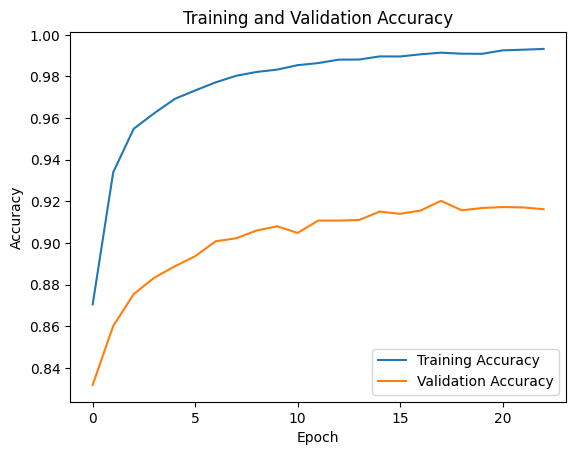

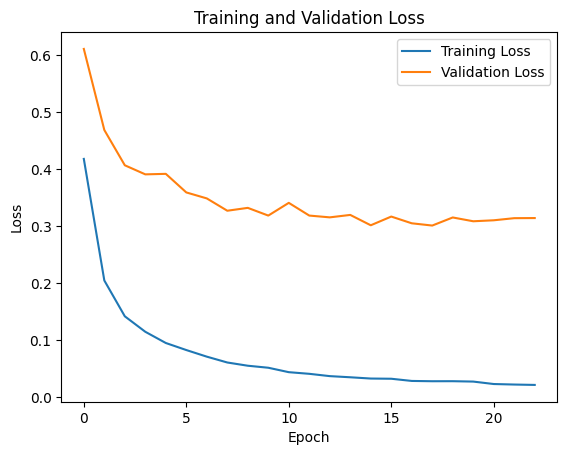

In [ ]:
plt.plot(history_mobile_finetuned.history['accuracy'], label = 'Training Accuracy')
plt.plot(history_mobile_finetuned.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history_mobile_finetuned.history['loss'], label='Training Loss')
plt.plot(history_mobile_finetuned.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

272/272 ━━━━━━━━━━━━━━━━━━━━ 342s 1s/step


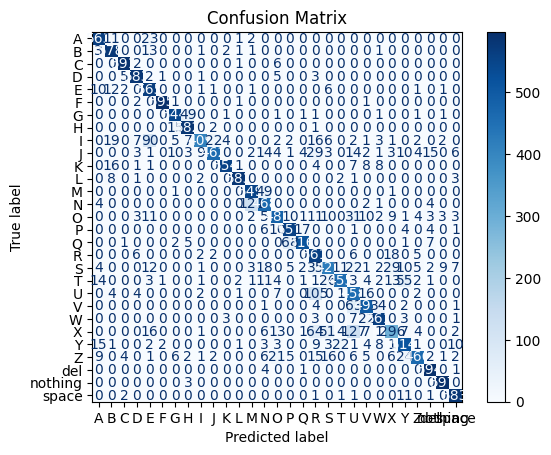

In [ ]:
nb_samples= val_gen.samples
y_pred_net = model_mobile.predict(val_gen, steps=int(np.ceil(nb_samples/val_gen.batch_size)))
y_pred_classes = np.argmax(y_pred_net, axis=1)
y_true = val_gen.classes
cm = confusion_matrix(y_true, y_pred_classes)
class_names = list(val_gen.class_indices.keys())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Export Model

- Export Model to Save Model

In [ ]:
# model.export('../save_model/')
model_mobile.export('../save_model/')


INFO:tensorflow:Assets written to: ../save_model/assets


INFO:tensorflow:Assets written to: ../save_model/assets


Saved artifact at '../save_model/'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name='keras_tensor_315')
Output Type:
  TensorSpec(shape=(None, 29), dtype=tf.float32, name=None)
Captures:
  1488772873232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1488782163488: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1488782157504: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1488782159616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1488782156272: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1488782158384: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1488787730176: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1488787732816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1488787719440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1488787729824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1488787731760: TensorSpec(shape

- Export to tensorflowlite

In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model('../save_model/')

tflite_model = converter.convert()

with open('../tflite_model/Model_SignLang.tflite','wb') as f:
    f.write(tflite_model)